In [1]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [3]:
#Get API url 
url = "http://api.openweathermap.org/data/2.5/weather?"
    
    
#See list of cities to get information and lists
#cities 

#Chose Cape Town to see other columns
#response = requests.get(url + "cape town" + "&appid=" + w_key)
#w_city_d = response.json()
#pprint(w_city_d)

# Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
#Temperature is in Kelvins so change the unit of measurement to F°
units = "imperial"
#Create lists for variables needed
all_cities = []
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

#Create a counter for sucessive API calls
city_count = 0
set_count = 1

#query_url =url + one_city + "&appid=" + w_key +"&units=imperial"
#query_url= f'{url}{one_city}&appid={w_key}&units={units}'
#query_url = f"{url}&appid={w_key}&units={units}&q="

In [6]:
# Print things at start of loop 
print("Beginning Data Retrieval")
print("------------------------------")
#Make loop for going trough cities 

for one_city in cities:
    
    #params = f'q={one_city}&appid={w_key}&units={units}'
    #response = requests.get(url + params).json()
 
    #Add exceptions in loop to avoid it stopping from missing city values 
    try:
        params = f'q={one_city}&appid={w_key}&units={units}'
        response = requests.get(url + params).json()
        
    #Counter will change 
        city_count = city_count + 1
        
    #Append data series loop through cities will be used    
        all_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        #if city_count > 50: 
          #  set_count += 1 
           # city_count = 0 
        
        print(f'Processing Record {city_count} of {set_count}|{one_city}')
    
    except (KeyError):
        print("City not found. Skipping...")
        
        if city_count > 50: 
            set_count += 1 
            city_count = 0 

#Add intervals between queries to stay within API limits 
        time.sleep(3)



#Data retrieval is complete so announce it
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of 1|albany
Processing Record 2 of 1|yellowknife
Processing Record 3 of 1|rikitea
Processing Record 4 of 1|gombong
Processing Record 5 of 1|arraial do cabo
Processing Record 6 of 1|ancud
Processing Record 7 of 1|ushuaia
Processing Record 8 of 1|mahebourg
Processing Record 9 of 1|punta arenas
City not found. Skipping...
Processing Record 11 of 1|manokwari
Processing Record 12 of 1|mount isa
Processing Record 13 of 1|cayenne
City not found. Skipping...
Processing Record 15 of 1|busselton
Processing Record 16 of 1|adrar
Processing Record 17 of 1|warrington
Processing Record 18 of 1|cape town
Processing Record 19 of 1|khomutovo
Processing Record 20 of 1|codrington
City not found. Skipping...
Processing Record 22 of 1|jamestown
City not found. Skipping...
Processing Record 24 of 1|chudovo
Processing Record 25 of 1|kremenki
Processing Record 26 of 1|kapaa
Processing Record 27 of 1|barrow
Processing Record 28 of 1|hil

Processing Record 12 of 5|udachnyy
Processing Record 13 of 5|pitimbu
Processing Record 14 of 5|copiapo
Processing Record 15 of 5|waipawa
Processing Record 16 of 5|coihaique
Processing Record 17 of 5|aklavik
Processing Record 18 of 5|mabay
Processing Record 19 of 5|moyale
Processing Record 20 of 5|lao cai
Processing Record 21 of 5|svetlogorsk
Processing Record 22 of 5|salina cruz
Processing Record 23 of 5|ekhabi
Processing Record 24 of 5|port hedland
City not found. Skipping...
Processing Record 26 of 5|fortuna
Processing Record 27 of 5|hasaki
Processing Record 28 of 5|caravelas
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of 5|tateyama
Processing Record 32 of 5|kavieng
Processing Record 33 of 5|cockburn town
Processing Record 34 of 5|najran
Processing Record 35 of 5|hurricane
Processing Record 36 of 5|daru
Processing Record 37 of 5|quimperle
Processing Record 38 of 5|chuy
Processing Record 39 of 5|visnes
Processing Record 40 of 5|pinar del rio
Processing

Processing Record 43 of 8|novoselytsya
City not found. Skipping...
Processing Record 45 of 8|raudeberg
Processing Record 46 of 8|sabha
Processing Record 47 of 8|revelstoke
Processing Record 48 of 8|dickinson
Processing Record 49 of 8|kalmunai
Processing Record 50 of 8|taylorville
Processing Record 51 of 8|alofi
Processing Record 52 of 8|shache
Processing Record 53 of 8|neubrandenburg
Processing Record 54 of 8|marsabit
Processing Record 55 of 8|airai
Processing Record 56 of 8|vardo
Processing Record 57 of 8|itarema
Processing Record 58 of 8|vaitape
Processing Record 59 of 8|eseka
Processing Record 60 of 8|biltine
Processing Record 61 of 8|athabasca
Processing Record 62 of 8|juneau
Processing Record 63 of 8|marawi
Processing Record 64 of 8|zhangjiakou
Processing Record 65 of 8|bagdarin
Processing Record 66 of 8|kargasok
Processing Record 67 of 8|podgornoye
Processing Record 68 of 8|mitsamiouli
Processing Record 69 of 8|gopalganj
City not found. Skipping...
Processing Record 1 of 9|arteag

# Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [9]:
#Convert to pandas DataFrame (code from class)
weather_dict = ({"City": all_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

weather_df = pd.DataFrame(weather_dict)
weather_df.head(14)
#weather_df = pd.DataFrame.from_dict(weather_dict, orient='index').transpose()
#weather_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,55.00,73,100,1.01,US,1619796182
1,Yellowknife,62.4560,-114.3525,27.00,93,90,14.97,CA,1619795602
2,Rikitea,-23.1203,-134.9692,78.46,75,58,18.63,PF,1619796385
3,Gombong,-7.6072,109.5142,55.00,100,73,2.98,ID,1619796385
4,Arraial do Cabo,-22.9661,-42.0278,77.00,69,40,9.22,BR,1619796386
5,Ancud,-41.8697,-73.8203,55.99,100,90,12.66,CL,1619795941
6,Ushuaia,-54.8000,-68.3000,41.00,87,40,2.06,AR,1619796182
7,Mahébourg,-20.4081,57.7000,78.80,78,75,13.80,MU,1619795784
8,Punta Arenas,-53.1500,-70.9167,41.00,93,75,9.22,CL,1619796387
9,Manokwari,-0.8667,134.0833,78.67,81,100,5.44,ID,1619796334


In [10]:
print(weather_df.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


In [11]:
#Clean dataframe (several NAs)
weather_df = weather_df.dropna(how= "any")

In [13]:
#Export city data into a csv 
filename = "cities.csv"
weather_df.to_csv("../output/cities.csv", index=False, header=True)



Inspect the data and remove the cities where the humidity > 100%.

In [14]:
#Something is weird with describe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02
mean,19.868545,15.615058,64.038769,67.056818,56.831439,8.279280,1.619796e+09
std,32.606989,92.120663,20.106197,22.807847,37.804752,5.336894,2.410836e+02
min,-54.800000,-175.200000,-3.440000,3.000000,0.000000,0.400000,1.619796e+09
25%,-6.145600,-69.228275,51.010000,53.000000,20.000000,4.312500,1.619796e+09
50%,22.281200,20.916700,69.035000,72.000000,75.000000,6.920000,1.619797e+09
75%,46.904250,100.786750,78.800000,84.000000,91.000000,11.390000,1.619797e+09
max,78.218600,179.316700,108.810000,100.000000,100.000000,26.460000,1.619797e+09


In [15]:
#Get the indices of cities that have humidity over 100%.
weather_df["Humidity"].max()

100

Max humidity is not over 100% so we don't need to clean data. 

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

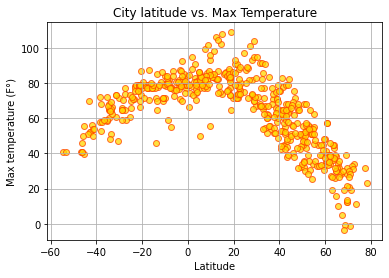

In [33]:
#Create variables 
latitude_p = weather_df["Lat"]
temp_p= weather_df["Max Temp"]
humidity_p=weather_df["Humidity"]
cloud_p=weather_df["Cloudiness"]
wind_sp = weather_df["Wind Speed"]

#Create scatterplot 
plt.scatter(latitude_p, temp_p, marker="o", facecolors="gold", edgecolors="orangered",
             alpha=0.75)
plt.grid(True)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F°)")

#Create png image 
plt.savefig("sp_latitude_vs_maxtemp.png")


In this scatterplot we can observe the maximum current temperature (in Fahrenheit) at different latitudes. The temperature remains rather warm around the equator and it decreses the further it goes apart form the Equator (lat 0°). At higher latitudes, there are some extremely cold temperatures, that start appearing around 50°N and onward. There are not as many cities below 40°S, so we don't see the drop in temperatures.  

### Latitude vs. Humidity Plot

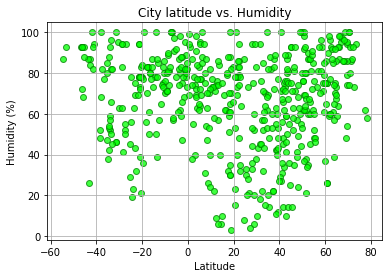

In [34]:
#Create scatterplot 
plt.scatter(latitude_p, humidity_p, marker="o", facecolors="lime", edgecolors="green",
             alpha=0.75)
plt.grid(True)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure
plt.savefig("sp_latitude_vs_humidity.png")

In this scatterplot we can observe the humidity percentage at different latitudes. Humidity percentage is very varied (from very humid (100%) to dry (>20%) around the equator). But in these plot we can see that in cities that there are no dry cities close to the poles. At latitude 60N and -40 S, there are almost nos cities with a humidity percentage lower than 40%.

### Latitude vs. Cloudiness Plot

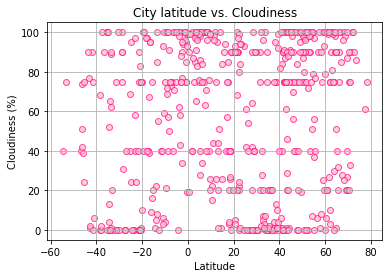

In [35]:
#Create scatterplot 
plt.scatter(latitude_p, cloud_p, marker="o", facecolors="pink", edgecolors="deeppink",
             alpha=0.75)
plt.grid(True)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Figure 
plt.savefig("sp_latitude_vs_Cloudiness.png")

In this scatterplot we can observe the cloudiness percentage at different latitudes. There doesn't seem to be a relationship with cloudiness and latitude due to the high variance of cloudiness in different cities across latitudes. 

### Latitude vs. Wind Speed Plot

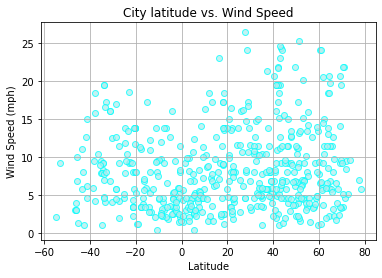

In [36]:
#Create scatterplot 
plt.scatter(latitude_p, wind_sp, marker="o", facecolors="paleturquoise", edgecolors="cyan",
             alpha=0.75)
plt.grid(True)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Make figure 
plt.savefig("sp_latitude_vs_wind.png")

In this scatterplot we can observe the wind speed in miles per hour at different latitudes. In the Southern Hemisphere it doesn't seem to be related to latitude. But in this plot we can see that there are cities with really high wind speeds after 30°N. So we can say that there are more windy cities in the northern hemisphere than in the southern hemisphere. 

## Linear Regression

In [20]:
#Change dataframe types 
#Everything is an object so change values to what they have to be 
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

In [21]:
#Make a group for the north hemisphere and the south hemisphere 
north_hem = weather_df[weather_df['Lat'] > 0]
south_hem= weather_df[weather_df['Lat'] < 0]

In [22]:
#Check both dataframes to see if they work 
north_hem.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,55.00,73.0,100.0,1.01,US,1619796182
1,Yellowknife,62.4560,-114.3525,27.00,93.0,90.0,14.97,CA,1619795602
11,Cayenne,4.9333,-52.3333,82.40,83.0,75.0,4.61,GF,1619795809
13,Adrar,20.5022,-10.0711,90.61,23.0,93.0,4.74,MR,1619796005
14,Warrington,53.3925,-2.5802,55.00,66.0,90.0,4.61,GB,1619796395
16,Khomutovo,52.4658,104.4025,39.20,60.0,0.0,6.71,RU,1619796396
18,Jamestown,42.0970,-79.2353,45.00,75.0,75.0,21.85,US,1619796119
19,Chudovo,59.1167,31.6833,44.51,71.0,100.0,4.81,RU,1619796403
20,Kremenki,54.8850,37.1261,62.60,48.0,0.0,13.42,RU,1619796404
21,Kapaa,22.0752,-159.3190,71.60,83.0,90.0,13.80,US,1619796107


In [23]:
north_hem["Max Temp"]

0      55.00
1      27.00
11     82.40
13     90.61
14     55.00
       ...  
520    78.80
521    73.87
522    47.61
524    98.01
525    32.00
Name: Max Temp, Length: 367, dtype: float64

In [24]:
#south_hem.head()
print(south_hem.dtypes)


City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date            int64
dtype: object


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.85
The r-squared is: 0.7164399942891738
y = -0.93x + 95.97


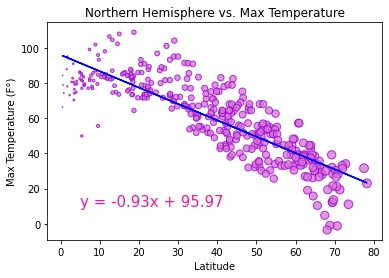

In [25]:
#Create values for regression and correlation graphs 
#north_lat = north_hem["Lat"]
#north_temp =north_hem["Max Temp"]

# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"], north_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(5,10),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("N_vs_maxtemp.png")

The regression indicates that there is a strong negative relationship between the latitude and the max temperature of the cities fund in the Northern Hemisphere. The closer a city is from the Equator, the warmer it is and if the latitude increases, temperature decreases ( getting closer to the North Pole). 

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.78
The r-squared is: 0.6066429530324345
y = 0.65x + 84.44


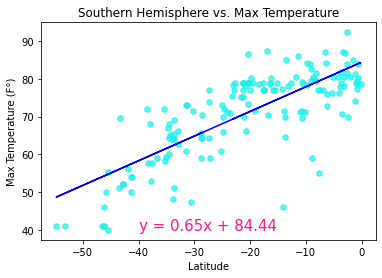

In [26]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(-40,40),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("S_vs_maxtemp.png")

The regression indicates that there is a strong positive relationship between the latitude and the max temperature of the cities fund in the Southern Hemisphere. The closer a city is from the Equator, the warmer it is and if the latitude decreases the temperature as well. This can be explained because it is getting closer to the Antartic circle and South Pole).

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.16
The r-squared is: 0.024609450029047804
y = 0.19x + 57.3


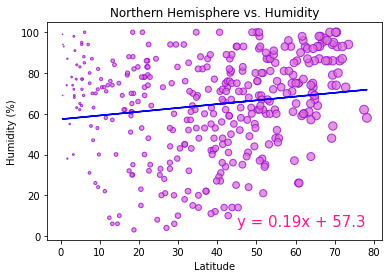

In [27]:
# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"], north_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(45,5),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("N_vs_humidity.png")

There appears to be a very weak relationship between latitude and humidiy percentage in the northern hemisphere.

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09
The r-squared is: 0.008280484755785883
y = 0.12x + 75.9


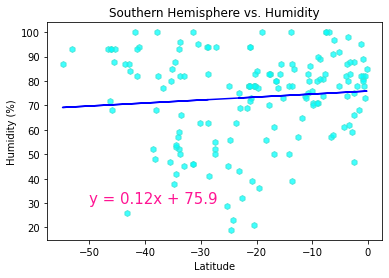

In [28]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-50,30),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("S_vs_humidity.png")

There appears to be a very weak relationship between latitude and humidity percentage in the southern hemisphere.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.02
The r-squared is: 0.00048446929878625145
y = 0.04x + 57.11


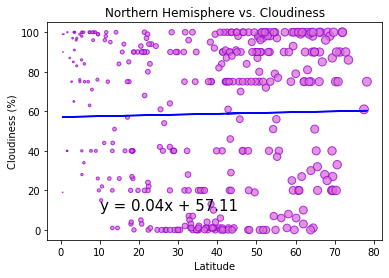

In [29]:

correlation = st.pearsonr(north_hem["Lat"], north_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Cloudiness"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.annotate(line_eq,(10,10),fontsize=15,color="black")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("N_vs_cloudiness.png")

There appears to be a very weak relationship between latitude and cloudiness in the northern hemisphere.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.29
The r-squared is: 0.0835859870704874
y = 0.79x + 69.01


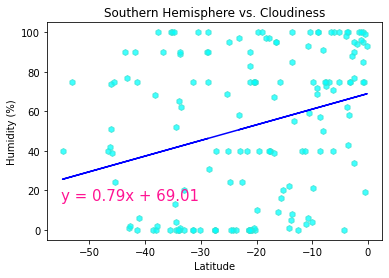

In [37]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Cloudiness"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-55,15),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("S_vs_cloudiness.png")

There is a week relationship between latitude and cloudiness percentage in the southern hemisphere. There are cities with no clouds and others with lots of them but still there is a high variability.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.14
The r-squared is: 0.020888409989111
y = 0.04x + 7.19


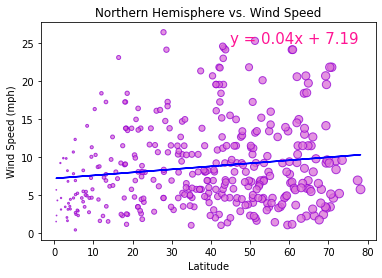

In [38]:

correlation = st.pearsonr(north_hem["Lat"], north_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
#Change colors 
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

#Add title and labels to scatter plot 
plt.title( "Northern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(45,25),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Make figure 
plt.savefig("N_vs_windspeed.png")

There is a very weak relationship between latitude and wind speed in the northern hemisphere. 

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.21
The r-squared is: 0.04610483892229726
y = -0.07x + 5.87


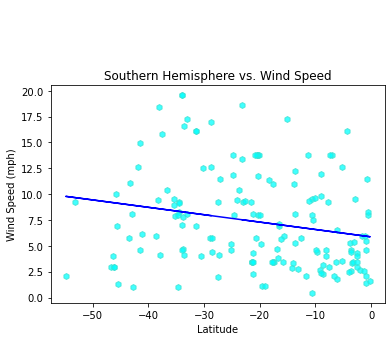

In [32]:
# Equations for correlation and regression

correlation = st.pearsonr(south_hem["Lat"], south_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use the same scatterplot made before 
#Change colors 
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Southern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(-25,27),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Save figure 
plt.savefig("S_vs_windspeed.png")

There is a weak relationship between latitude and wind speed in the southern hemisphere.